* Name- Aditya Raj
* Reg. No- 12020440
* Roll No- 69

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salary = pd.read_csv('data_cleaned_2021.csv')
salary.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
# replacing all -1 with np.nan (the documentation said this is where web scraping failed)
salary = salary.replace(-1, np.nan)

# replacing all 'na' text with np.nan
salary = salary.replace('na$', np.nan, regex = True)

# first 5 rows of the dataset
print(salary.head())

   index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2       

In [9]:
# dropping some unused columns (duplicates or mostly empty)
salary = salary.rename(columns={'index':'old_index'})
salary.drop(columns = ['old_index', 'Salary Estimate', 'Job Description', 'Employer provided', 'Company Name', 'Competitors', 
                       'Hourly', 'Job Title', 'Location'], inplace = True)

In [10]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rating              731 non-null    float64
 1   Headquarters        741 non-null    object 
 2   Size                742 non-null    object 
 3   Founded             692 non-null    float64
 4   Type of ownership   742 non-null    object 
 5   Industry            742 non-null    object 
 6   Sector              742 non-null    object 
 7   Revenue             742 non-null    object 
 8   Lower Salary        742 non-null    int64  
 9   Upper Salary        742 non-null    int64  
 10  Avg Salary(K)       742 non-null    float64
 11  company_txt         738 non-null    object 
 12  Job Location        742 non-null    object 
 13  Age                 692 non-null    float64
 14  Python              742 non-null    int64  
 15  spark               742 non-null    int64  
 16  aws     

In [11]:
salary.shape

(742, 33)

In [12]:
# what type of data is in each column
salary.dtypes

Rating                float64
Headquarters           object
Size                   object
Founded               float64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                   float64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau                 int64
bi                      int64
flink                   int64
mongo                   int64
google_an               int64
job_title_sim          object
seniority_by_title     object
Degree                 object
dtype: obj

In [13]:
#shows which columns have any null values
salary.isnull().any()

Rating                 True
Headquarters           True
Size                  False
Founded                True
Type of ownership     False
Industry              False
Sector                False
Revenue               False
Lower Salary          False
Upper Salary          False
Avg Salary(K)         False
company_txt            True
Job Location          False
Age                    True
Python                False
spark                 False
aws                   False
excel                 False
sql                   False
sas                   False
keras                 False
pytorch               False
scikit                False
tensor                False
hadoop                False
tableau               False
bi                    False
flink                 False
mongo                 False
google_an             False
job_title_sim          True
seniority_by_title     True
Degree                 True
dtype: bool

In [14]:
# what proportion of data is missing from each column
salary.isna().sum()/len(salary)

Rating                0.014825
Headquarters          0.001348
Size                  0.000000
Founded               0.067385
Type of ownership     0.000000
Industry              0.000000
Sector                0.000000
Revenue               0.000000
Lower Salary          0.000000
Upper Salary          0.000000
Avg Salary(K)         0.000000
company_txt           0.005391
Job Location          0.000000
Age                   0.067385
Python                0.000000
spark                 0.000000
aws                   0.000000
excel                 0.000000
sql                   0.000000
sas                   0.000000
keras                 0.000000
pytorch               0.000000
scikit                0.000000
tensor                0.000000
hadoop                0.000000
tableau               0.000000
bi                    0.000000
flink                 0.000000
mongo                 0.000000
google_an             0.000000
job_title_sim         0.013477
seniority_by_title    0.699461
Degree  

In [15]:
#anothe way of finding Null record count along with their percentages 
total = salary.isnull().sum().sort_values(ascending = False)
percent =(salary.isnull().sum()/len(salary)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis =1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
seniority_by_title,519,0.699461
Degree,383,0.516173
Age,50,0.067385
Founded,50,0.067385
Rating,11,0.014825
job_title_sim,10,0.013477
company_txt,4,0.005391
Headquarters,1,0.001348
Industry,0,0.000000
keras,0,0.000000


In [16]:
# show unique values in particular column and Count of unique values
salary['Job Location'].nunique()
salary['Job Location'].unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'DE', 'ID',
       'RI', 'IA', 'SC', 'KS'], dtype=object)

In [17]:
# show descriptive statistics for quantitative columns
salary.describe(include = np.number)

,Rating,Founded,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,731.000000,692.000000,742.000000,742.000000,742.000000,692.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.688372,1969.969653,74.754717,128.214286,101.484501,51.030347,0.528302,0.225067,0.237197,0.522911,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,0.570353,54.089762,30.945892,45.128650,37.482449,54.089762,0.499535,0.417908,0.425651,0.499812,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,1.900000,1744.000000,15.000000,16.000000,15.500000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,1958.000000,52.000000,96.000000,73.500000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,1992.000000,69.500000,124.000000,97.500000,29.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2007.000000,91.000000,155.000000,122.500000,63.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,2019.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#show descriptive statistics for qualitiative columns
salary.describe(include = object)

,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,Job Location,job_title_sim,seniority_by_title,Degree
count,741,742,742,742,742,742,738,742,732,223,359
unique,197,8,9,60,25,13,342,37,9,2,2
top,"New York, NY",1001 - 5000,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,MassMutual,CA,data scientist,sr,M
freq,52,150,410,112,180,204,14,152,313,220,252


In [19]:
# find number of values for each unique entry in each qualitative column
for i in salary.select_dtypes(include = object):
    print(salary[i].value_counts())

New York, NY            52
San Francisco, CA       42
Chicago, IL             30
Cambridge, MA           20
Springfield, MA         14
                        ..
West Hills, CA           1
Fort Worth, TX           1
Kansas City, MO          1
Santa Fe Springs, CA     1
Centennial, CO           1
Name: Headquarters, Length: 197, dtype: int64
1001 - 5000      150
501 - 1000       134
10000+           130
201 - 500        117
51 - 200          94
5001 - 10000      76
1 - 50            31
unknown           10
Name: Size, dtype: int64
Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Hospital                           15
College / University               13
Other Organization                  5
School / School District            2
Name: Type of ownership, dtype: int64
Biotech & Pharmaceuticals                   112
Insurance Carriers                  

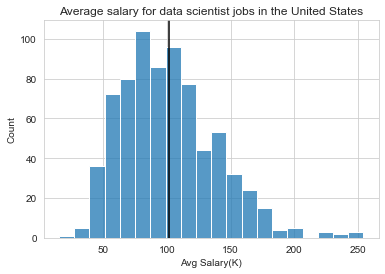

In [20]:
# example of a histplot to visualize quantitative data
sns.set_style("whitegrid")
sns.histplot(data = salary, x = 'Avg Salary(K)', bins = 20)
plt.title('Average salary for data scientist jobs in the United States')
# draw vertical line at average 
plt.axvline(x = salary['Avg Salary(K)'].mean(), color = 'black')

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '501 - 1000 '),
  Text(1, 0, '10000+ '),
  Text(2, 0, '1001 - 5000 '),
  Text(3, 0, '51 - 200 '),
  Text(4, 0, '201 - 500 '),
  Text(5, 0, '5001 - 10000 '),
  Text(6, 0, '1 - 50 '),
  Text(7, 0, 'unknown')])

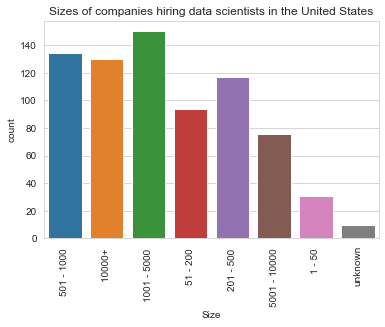

In [21]:
# example of a count plot to visualize qualitative data
sns.countplot(x = 'Size', data = salary)
plt.title('Sizes of companies hiring data scientists in the United States')
plt.xticks(rotation = 'vertical')

<AxesSubplot:title={'center':'Break down by Job title'}, ylabel='job_title_sim'>

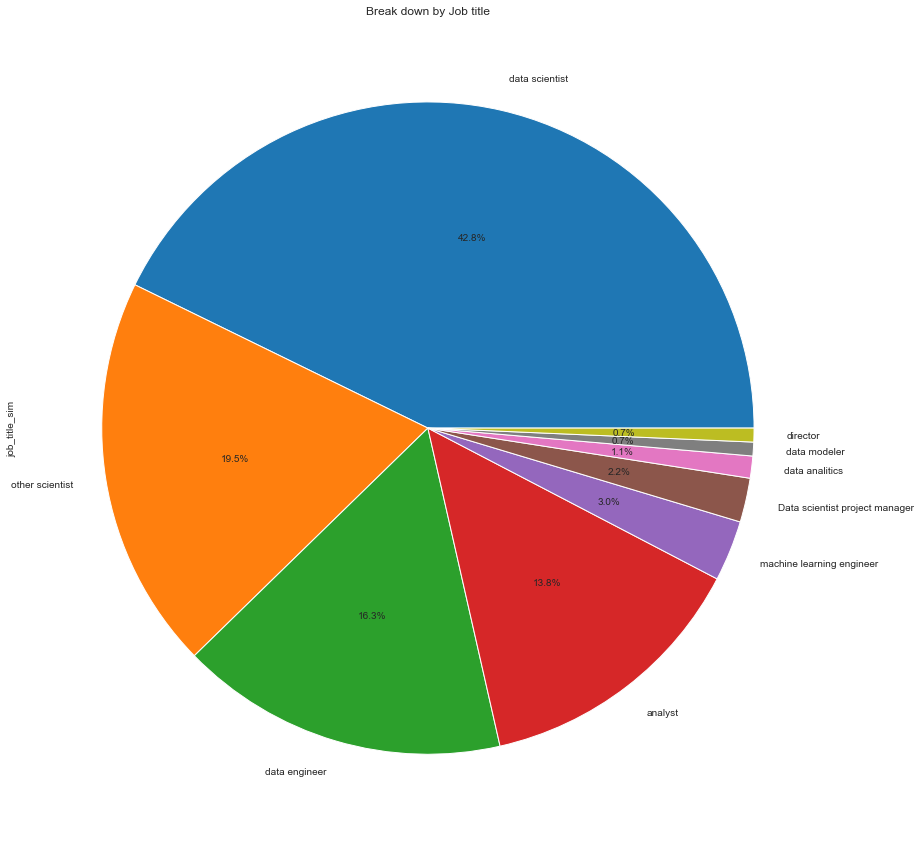

In [22]:
salary['job_title_sim'].value_counts(normalize=True).plot.pie(y ='Job title', title = 'Break down by Job title', figsize=(15,15), autopct='%1.1f%%')

In [23]:
salary.head(1)

,Rating,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Lower Salary,Upper Salary,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,3.8,"Goleta, CA",501 - 1000,1973.0,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),53,91,...,0,0,1,1,0,0,0,data scientist,NaN,M


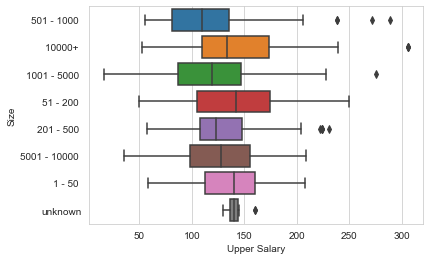

In [24]:
# salary['job_title_sim'].value_counts(normalize=True).plot.pie(y ='Job title', title = 'Break down by Job title', figsize=(15,15), autopct='%1.1f%%')
sns.boxplot(x='Upper Salary',y='Size',data=salary)
plt.show()